Notebook to investigate how the IRFs change with different parameter values

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os

from HANKStickyModel import HANKStickyModelClass

# Settings

In [2]:
savefolder = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + 'saved_models')

# Solve the models

## baseline


In [3]:
model_base = HANKStickyModelClass(name='baseline', par={'phi_K': 9.0}, savefolder=savefolder)
model_base.find_ss(do_print=True)
model_base.compute_jacs(do_print=True)
model_base.find_transition_path(do_print=True, do_print_unknowns=True)
model_base.find_IRFs(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 0.5 secs [283 iterations]
household problem in ss simulated in 0.1 secs [251 iterations]
steady state found in 17.4 secs
 beta   = 0.9599
 nu     = 1.2957
Discrepancy in A =   0.00000000
Discrepancy in L =   0.00000000
Discrepancy in Y =  -0.00000000
household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 0.7 secs
curly_Y and curly_D calculated for ra              in 0.7 secs
curly_Y and curly_D calculated for rl              in 0.7 secs
curly_E calculated in 1.9 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 4.2 secs

full Jacobians:
full Jacobian to unknowns computed in 10.3 secs [in evaluate_path(): 9.9 secs]
full Jacobian to shocks computed in 0.3 secs [in evaluate_path(): 0.1 secs]
finding the transition path:
 it =   0 -> max. abs. error = 3.00e-04
   r              : minval =   0.012 mea

In [17]:
paths = ['G','Y','C_hh','K','I',
         'N','w','tau','Pi','Pi_w','i','s','s_w','Z',
         'L_hh','A_hh',
         'rk','r','ra','rl',
         'q','B',
         'p_eq','Div','p_int','Div_int','p_k','Div_k']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w','clearing_Y','clearing_A', 'clearing_L', 'clearing_fund_start', 'clearing_fund_end']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}

## Investment adjustment costs

In [5]:
models = {
    'invest_adjust_50': {      # this is the baseline model
        'update_par': {
            'phi_K': 50
        },
        },
    'invest_adjust_5': {      # this is the baseline model
            'update_par': {
                'phi_K': 5
            },
    },
    'invest_adjust_20': {      # this is the baseline model
            'update_par': {
                'phi_K': 20
            },
    }
}

# investment ajdustment cost parameter

In [6]:
compare_models = ['invest_adjust_50', 'invest_adjust_5', 'invest_adjust_20']
load_models = ['invest_adjust_50', 'invest_adjust_5', 'invest_adjust_20']

In [7]:
# create other models to be analyzed
# init containter for models
models_solved = {}
models_solved['baseline'] = model_base
for m in compare_models:
    if  m in load_models:
        assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
        models_solved[m].load()
        print('model loaded')
    else:
        # init model
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
        # solve model
        models_solved[m].find_ss(do_print=False)
        models_solved[m].compute_jacs(do_print=False)
        models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
        models_solved[m].find_IRFs(do_print=False)
        models_solved[m].save()
        print(f'saved')
        print(f'solved')

Model: invest_adjust_50
model loaded
Model: invest_adjust_5
model loaded
Model: invest_adjust_20
model loaded


In [14]:
models_list = []
compare_models = ['invest_adjust_50', 'invest_adjust_5', 'invest_adjust_20']
labels = [f'$\phi_K = 50$', f'$\phi_K = 5$', f'$\phi_K = 20$']
for m in compare_models:
    models_list.append(models_solved[m])

### varnames ###


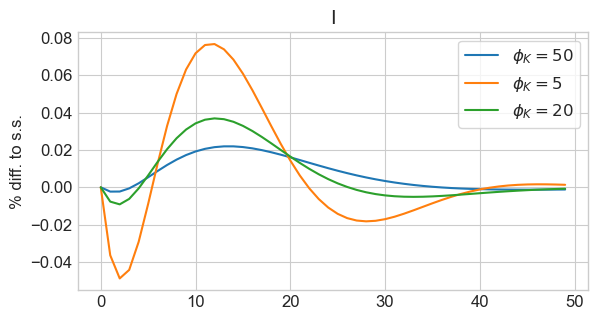

In [18]:
paths_I = ['I']
models_solved['baseline'].compare_IRFs(models_list, labels, paths_I, do_shocks=False, do_targets=False, ncols=3,T_max=100)

The higher adjustment costs make investment less volatile.

### shocks ###


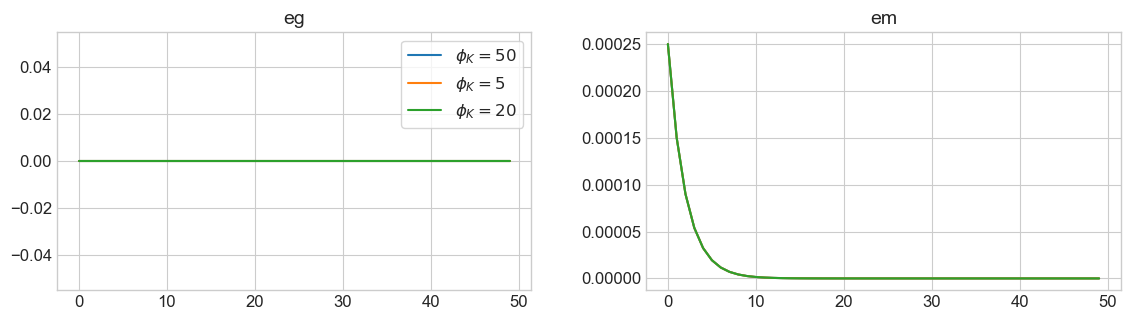


### varnames ###


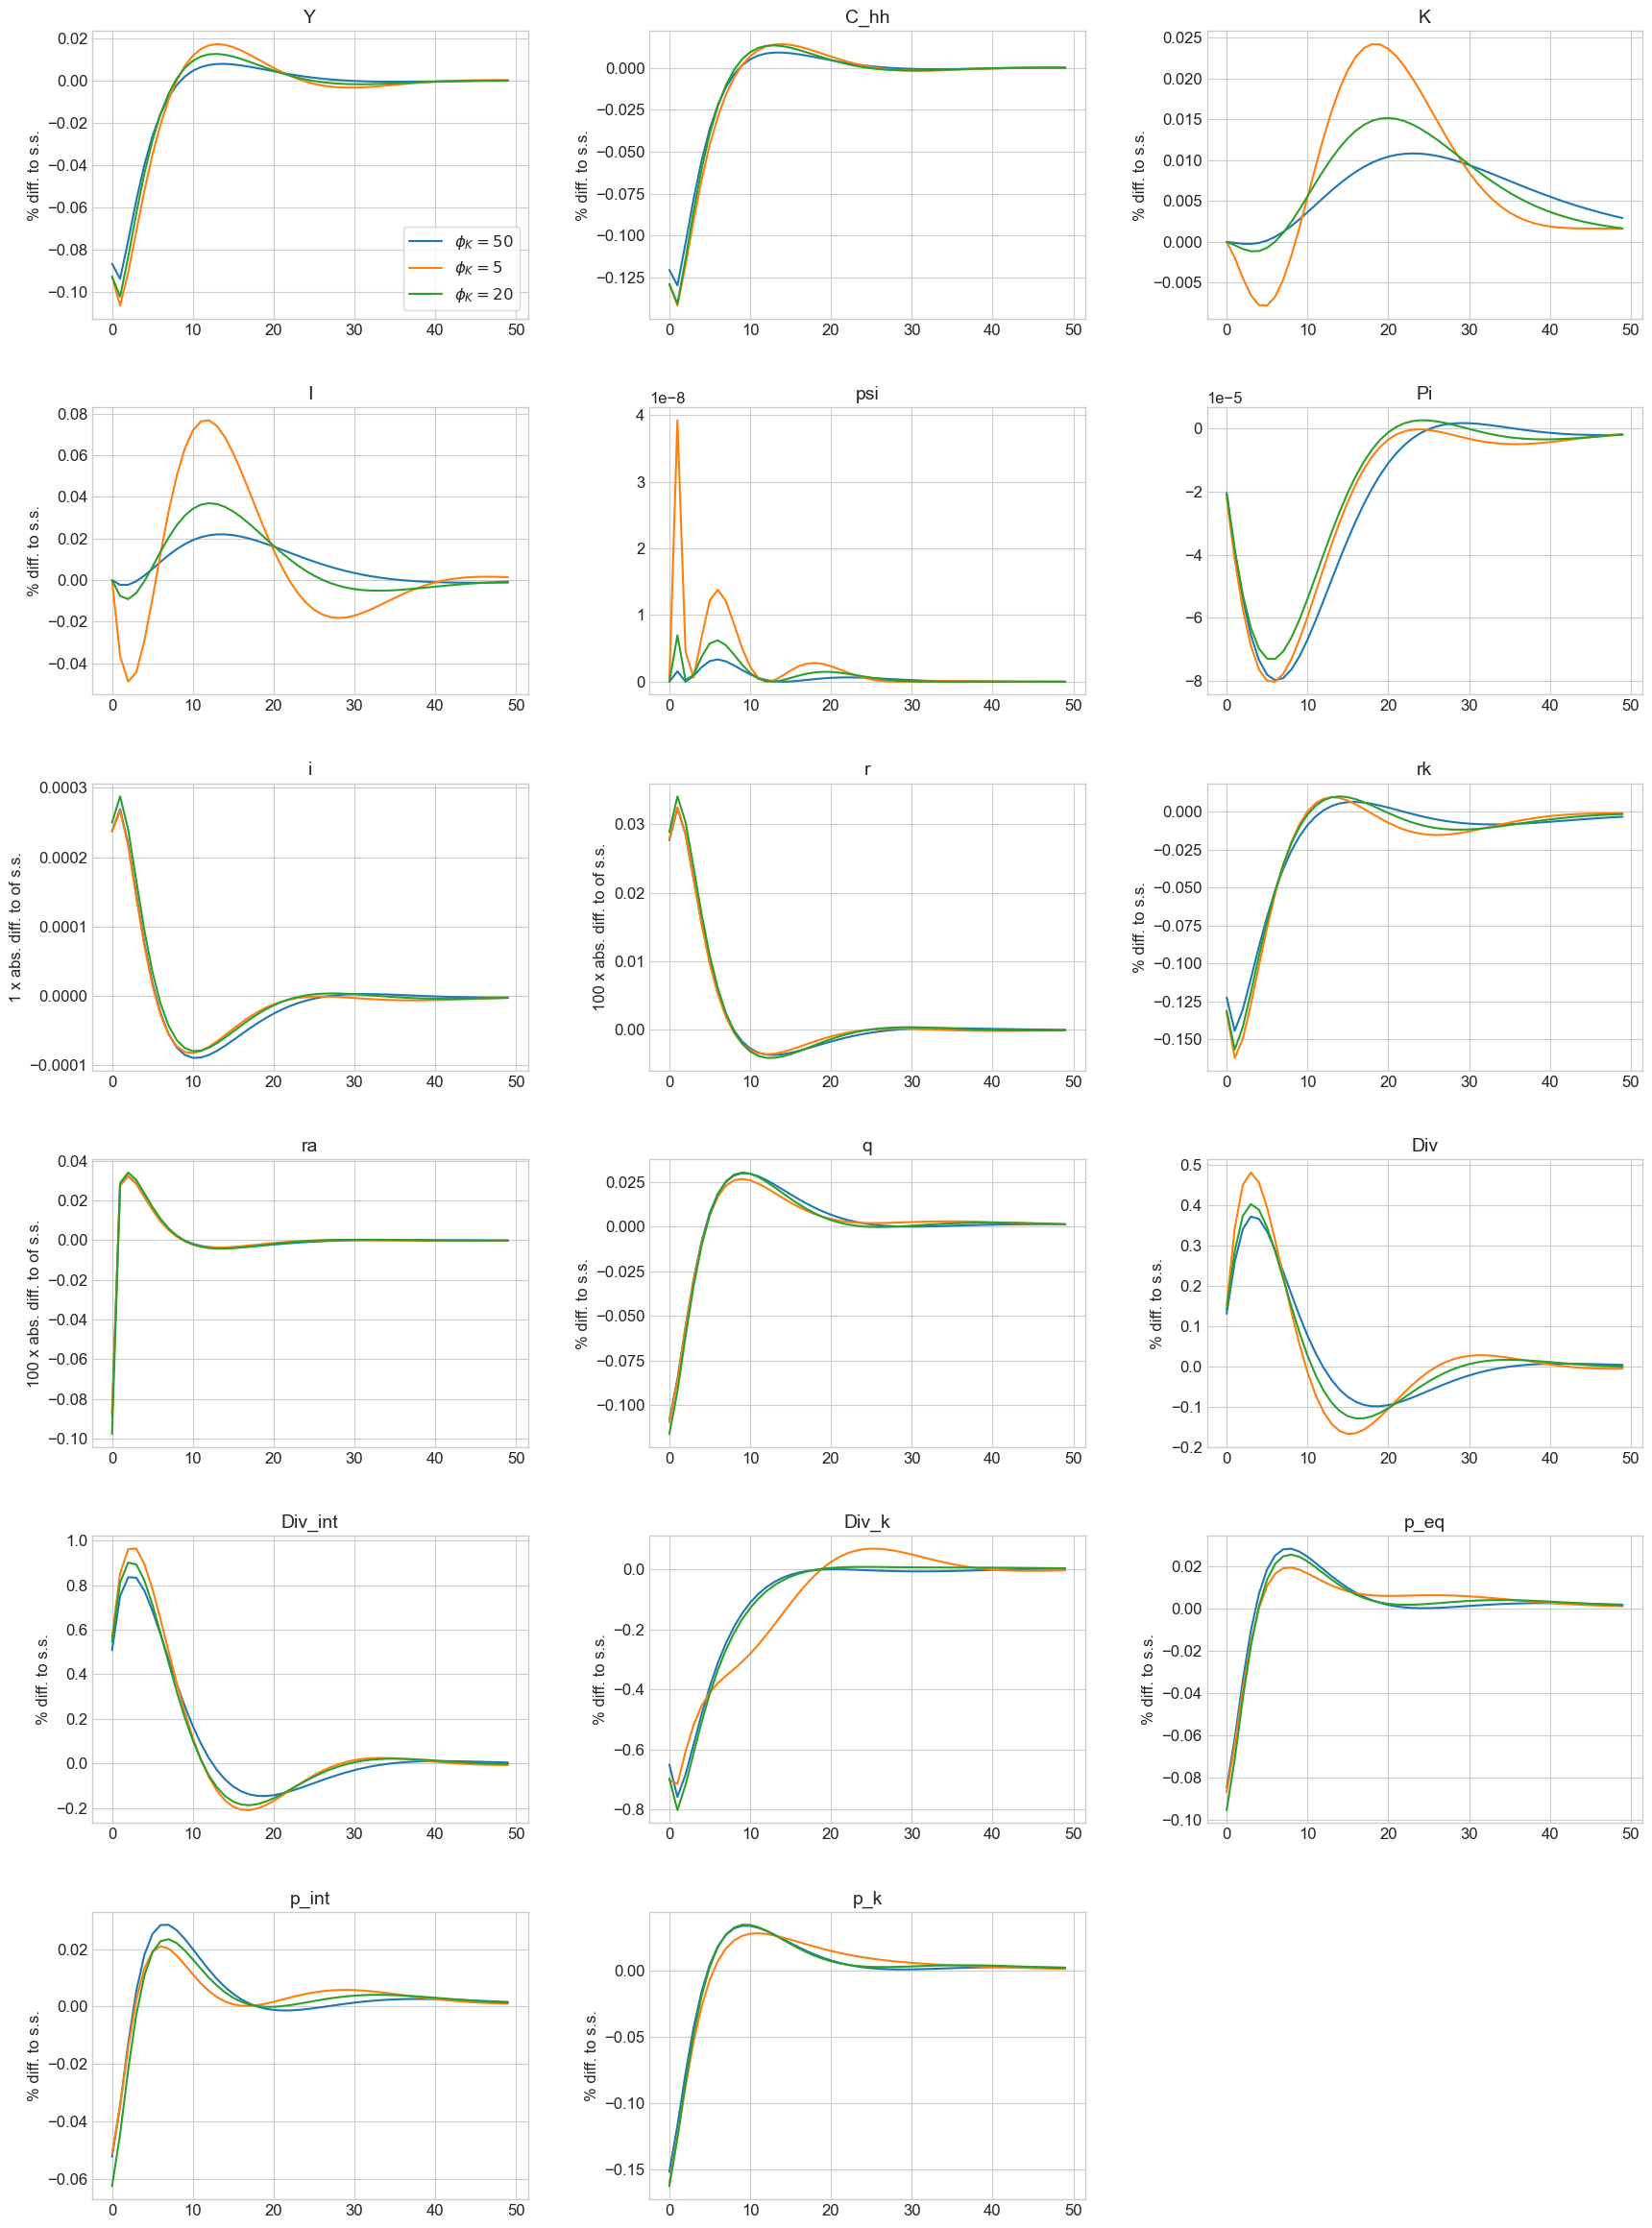

In [23]:
paths = ['Y','C_hh','K','I', 'psi',
         'Pi','i',
         'r','rk','ra',
         'q', 'Div','Div_int','Div_k', 'p_eq','p_int','p_k']
lvl_value = ['eg', 'em', 'i', 'Pi', 'psi']
abs_diff = ['r', 'ra', 'rl', 'i']
models_solved['baseline'].compare_IRFs(models_list, labels, paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=50, do_targets=False)

In [65]:
# par = model_base.par
# model_base.path.I[0, 1:]/model_base.path.I[0,:-1]
# I_frac = model_base.path.I[0, 1:]/model_base.path.I[0,:-1]
# I_frac_plus = model_base.path.I[0, 2:]/model_base.path.I[0,1:-1]
# S = lambda I_frac: par.phi_K / 2 * (I_frac - 1) ** 2
# S_deriv = lambda I_frac: par.phi_K * (I_frac - 1)
# LHS = 1 + S(I_frac[:-1]) + I_frac[:-1] * S_deriv(I_frac[:-1])
# RHS = model_base.path.Q[0, :-2] + (1 / (1 + model_base.path.r[0, 1:-1])) * I_frac_plus ** 2 * S_deriv(I_frac_plus)
# LHS - RHS


# MP Policy function

In [66]:
models['taylor_multiplicative'] = {'update_par': {
                'taylor': 'multiplicative'
            }}
models['taylor_simple'] = {'update_par': {
                'taylor': 'simple'
            }}

In [67]:
compare_models = ['taylor_multiplicative', 'taylor_simple', 'baseline']
load_models = ['taylor_multiplicative', 'taylor_simple', 'baseline']

In [68]:
# create other models to be analyzed
# init containter for models
models_solved = {}
for m in compare_models:
    if m in load_models:
        assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
        models_solved[m].load()
        print(f'model loaded')
    else:
        # init model
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
        # solve model
        models_solved[m].find_ss(do_print=False)
        models_solved[m].compute_jacs(do_print=False)
        models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
        models_solved[m].find_IRFs(do_print=False)
        models_solved[m].save()
        print(f'solved')
        print(f'saved')

Model: taylor_multiplicative
model loaded
Model: taylor_simple
model loaded
Model: baseline
model loaded


### shocks ###


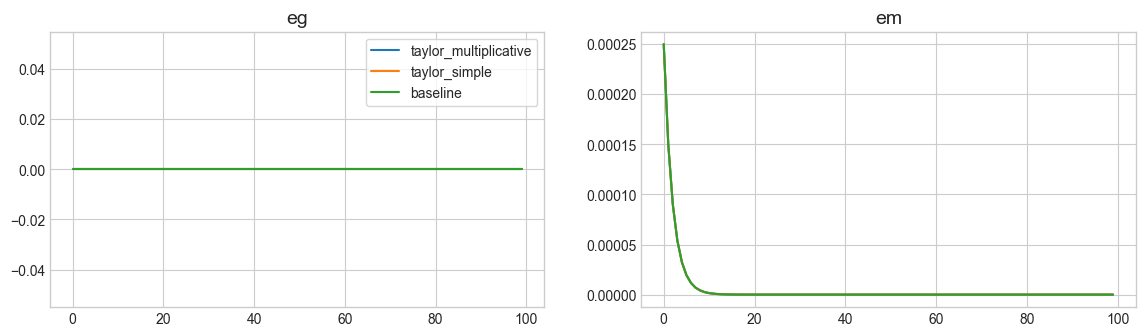


### varnames ###


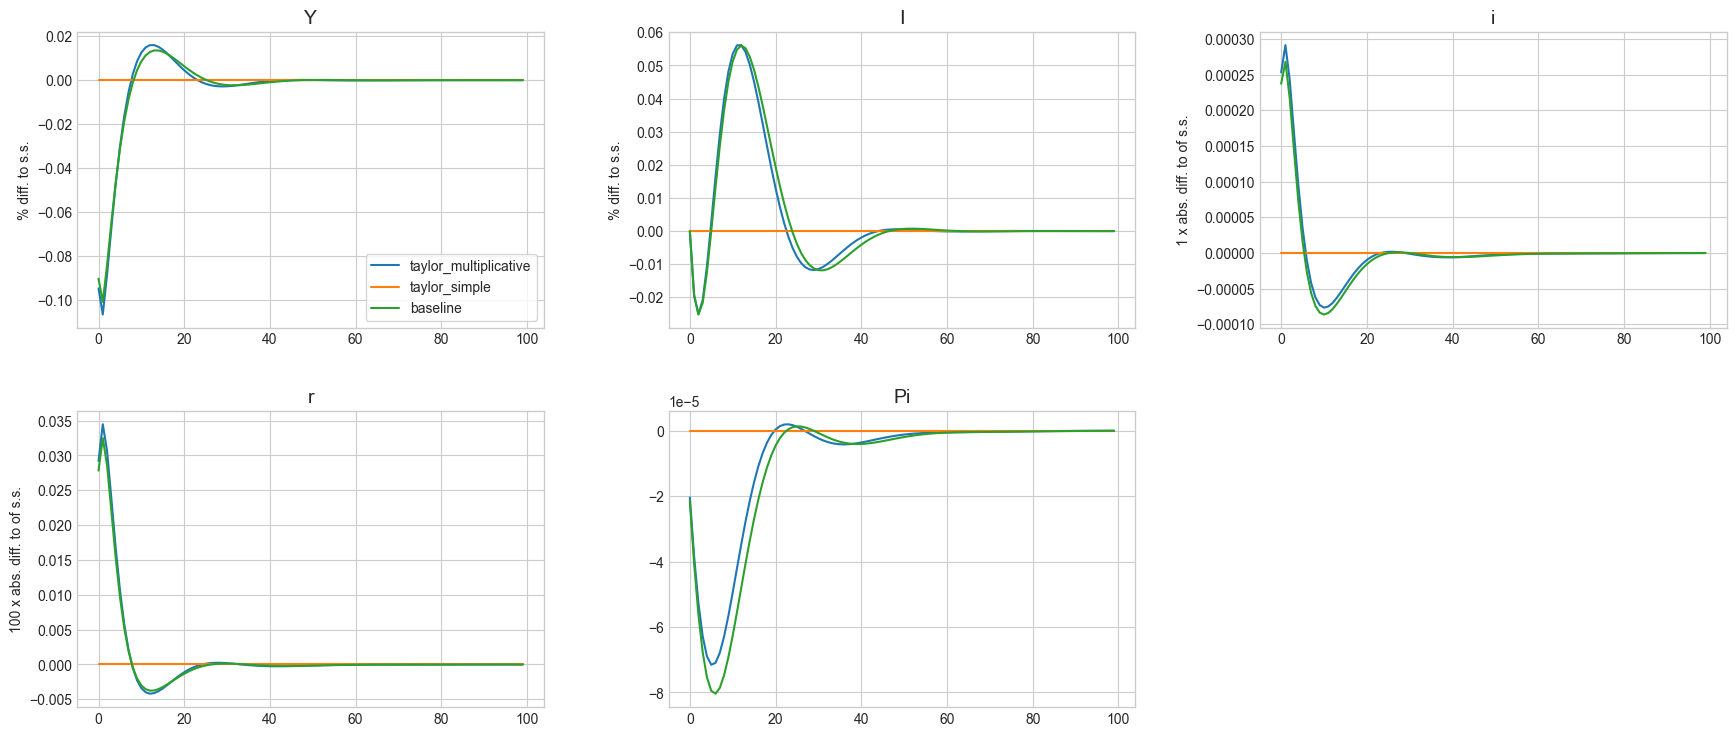


### tagets ###


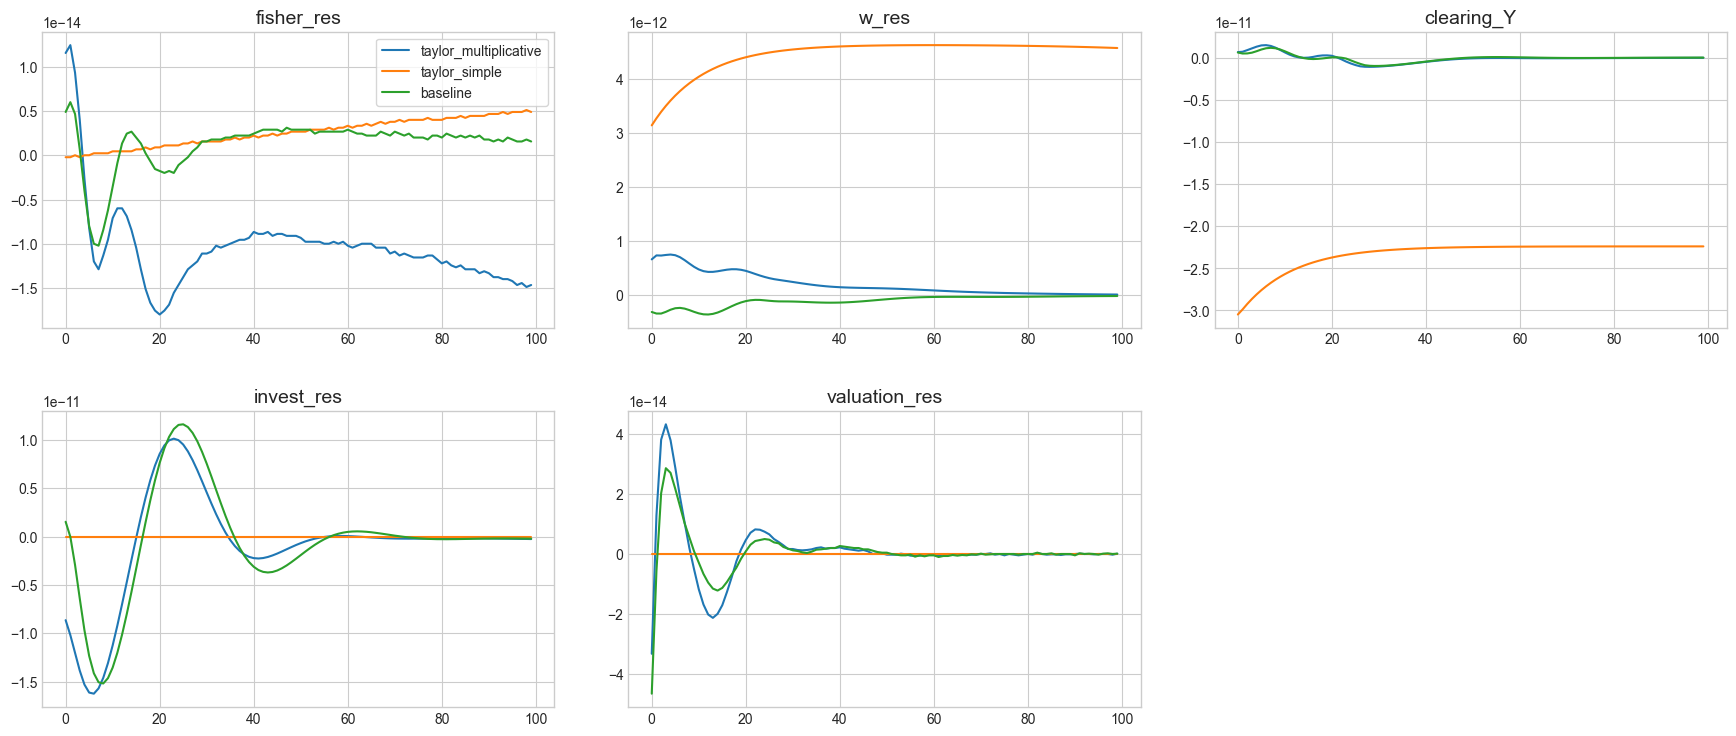

In [69]:
paths_MP = ['Y','I','i','r','Pi']
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=100)

# MP parameters

In [70]:
models['rho_m_05'] = {'update_par': {
                'rho_m': 0.5
            }}
models['rho_m_09'] = {'update_par': {
                'rho_m': 0.9
            }}

In [71]:
compare_models = ['rho_m_05', 'rho_m_09', 'baseline']
load_models = ['rho_m_05', 'rho_m_09', 'baseline']

In [72]:
# create other models to be analyzed
# init containter for models
# models_solved = {}
for m in compare_models:
    if m in load_models:
        assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
        models_solved[m].load()
        print(f'model loaded')
    else:
        # init model
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
        # solve model
        models_solved[m].find_ss(do_print=False)
        models_solved[m].compute_jacs(do_print=False)
        models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
        models_solved[m].find_IRFs(do_print=False)
        models_solved[m].save()
        print(f'solved')
        print(f'saved')

Model: rho_m_05
model loaded
Model: rho_m_09
model loaded
Model: baseline
model loaded


### shocks ###


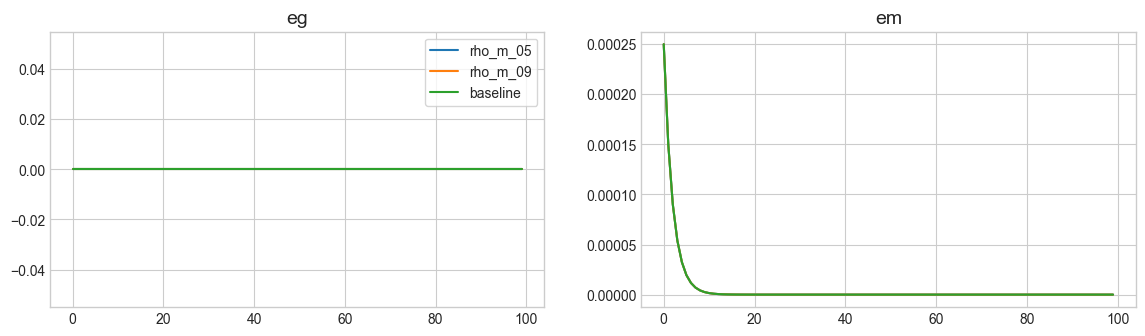


### varnames ###


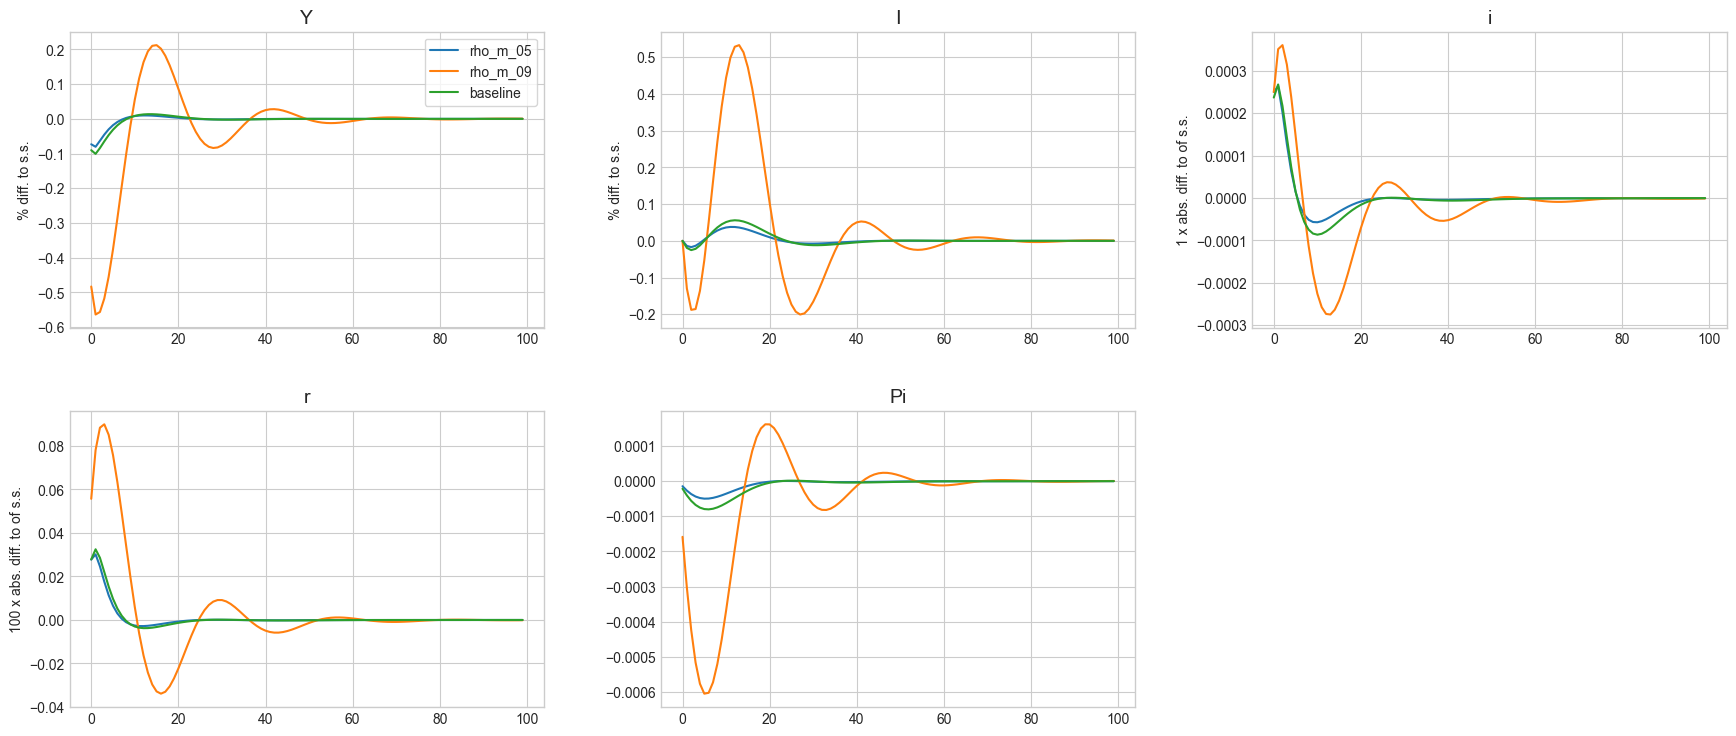


### tagets ###


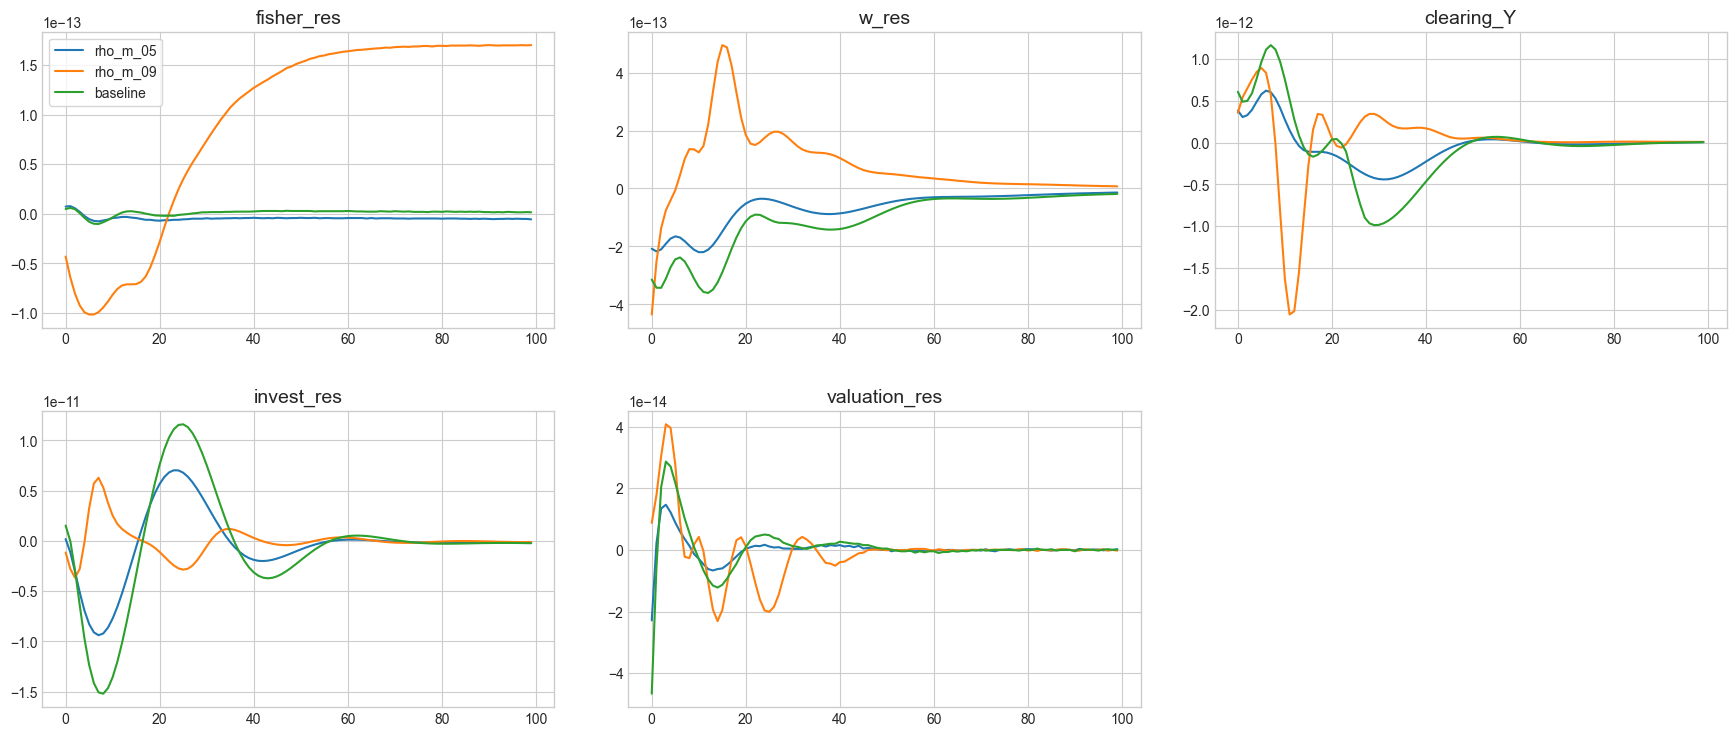

In [73]:
paths_MP = ['Y','I','i','r','Pi']
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=100)

Inertia of policy rule is key for the investment response!
A strong reaction in the nominal interest rate leads to a less eratic movement in the real interest rate, which is a key part of determinining investments.

## taylor rule coefficient phi_pi

In [74]:
models['phi_pi_11'] = {'update_par': {
                'phi_pi': 1.1
            }}
models['phi_pi_2'] = {'update_par': {
                'phi_pi': 2
            }}

In [75]:
compare_models = ['baseline', 'phi_pi_11', 'phi_pi_2']
load_models = ['baseline' ,'phi_pi_11', 'phi_pi_2']

In [76]:
# create other models to be analyzed
# init containter for models
# models_solved = {}
for m in compare_models:
    if m in load_models:
        assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
        models_solved[m].load()
        print(f'model loaded')
    else:
        # init model
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
        # solve model
        models_solved[m].find_ss(do_print=False)
        models_solved[m].compute_jacs(do_print=False)
        models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
        models_solved[m].find_IRFs(do_print=False)
        models_solved[m].save()
        print(f'solved')
        print(f'saved')

Model: baseline
model loaded
Model: phi_pi_11
model loaded
Model: phi_pi_2
model loaded


### shocks ###


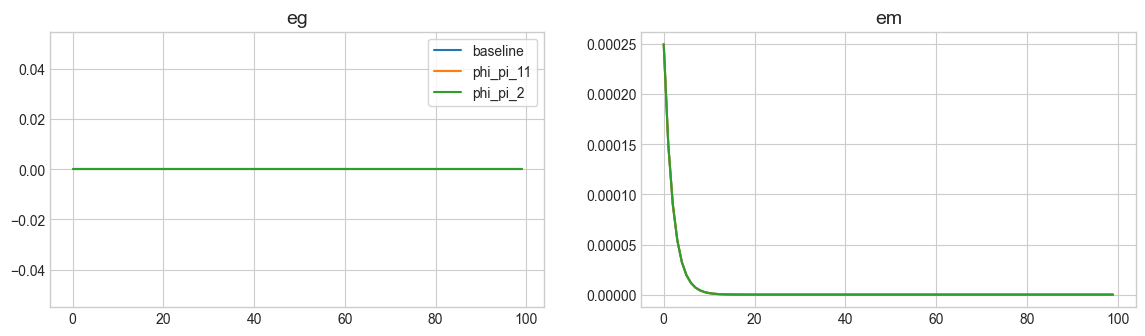


### varnames ###


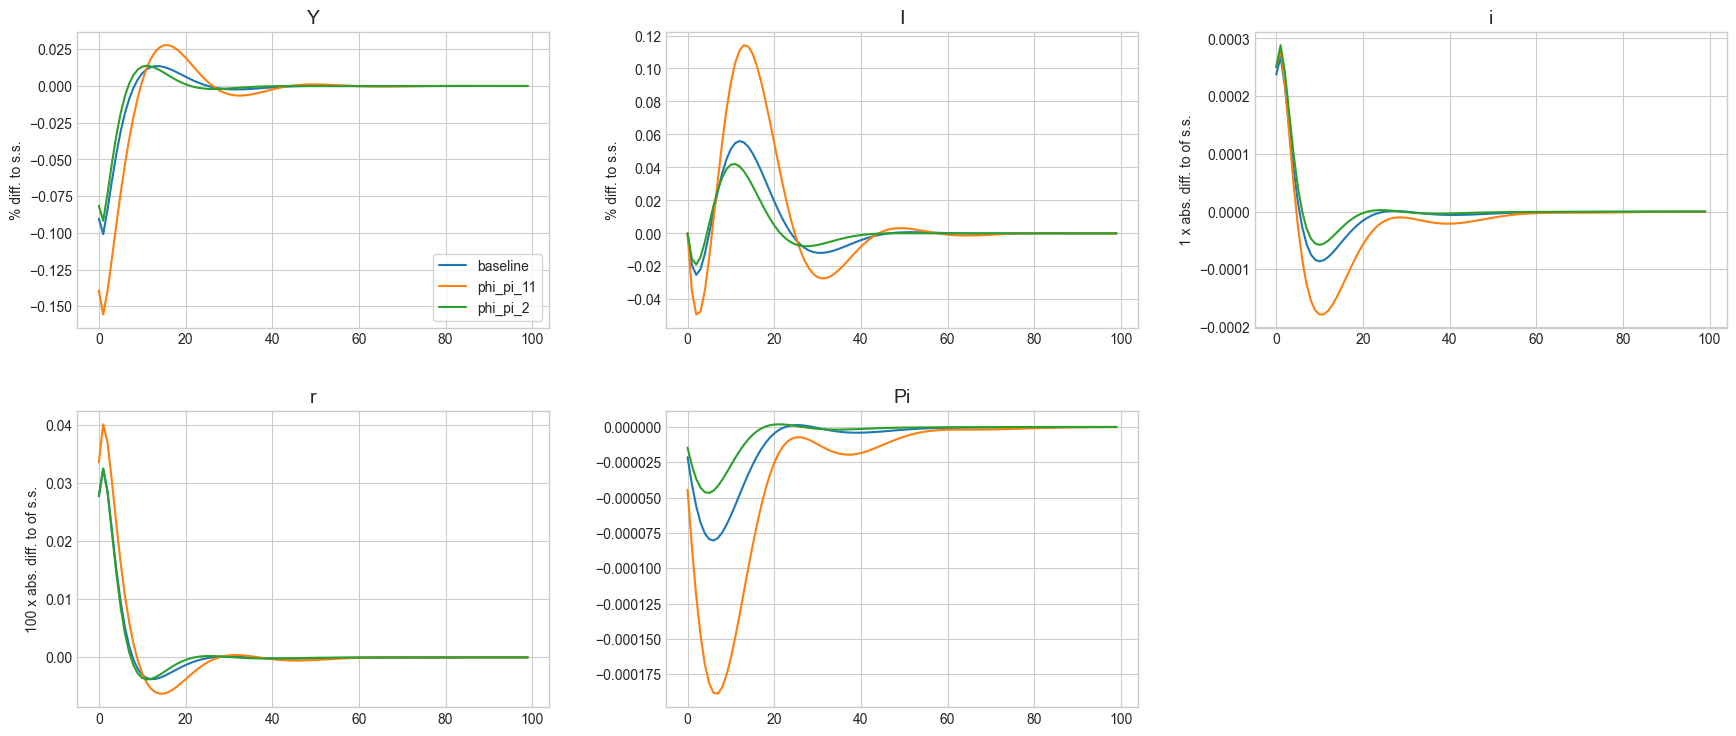


### tagets ###


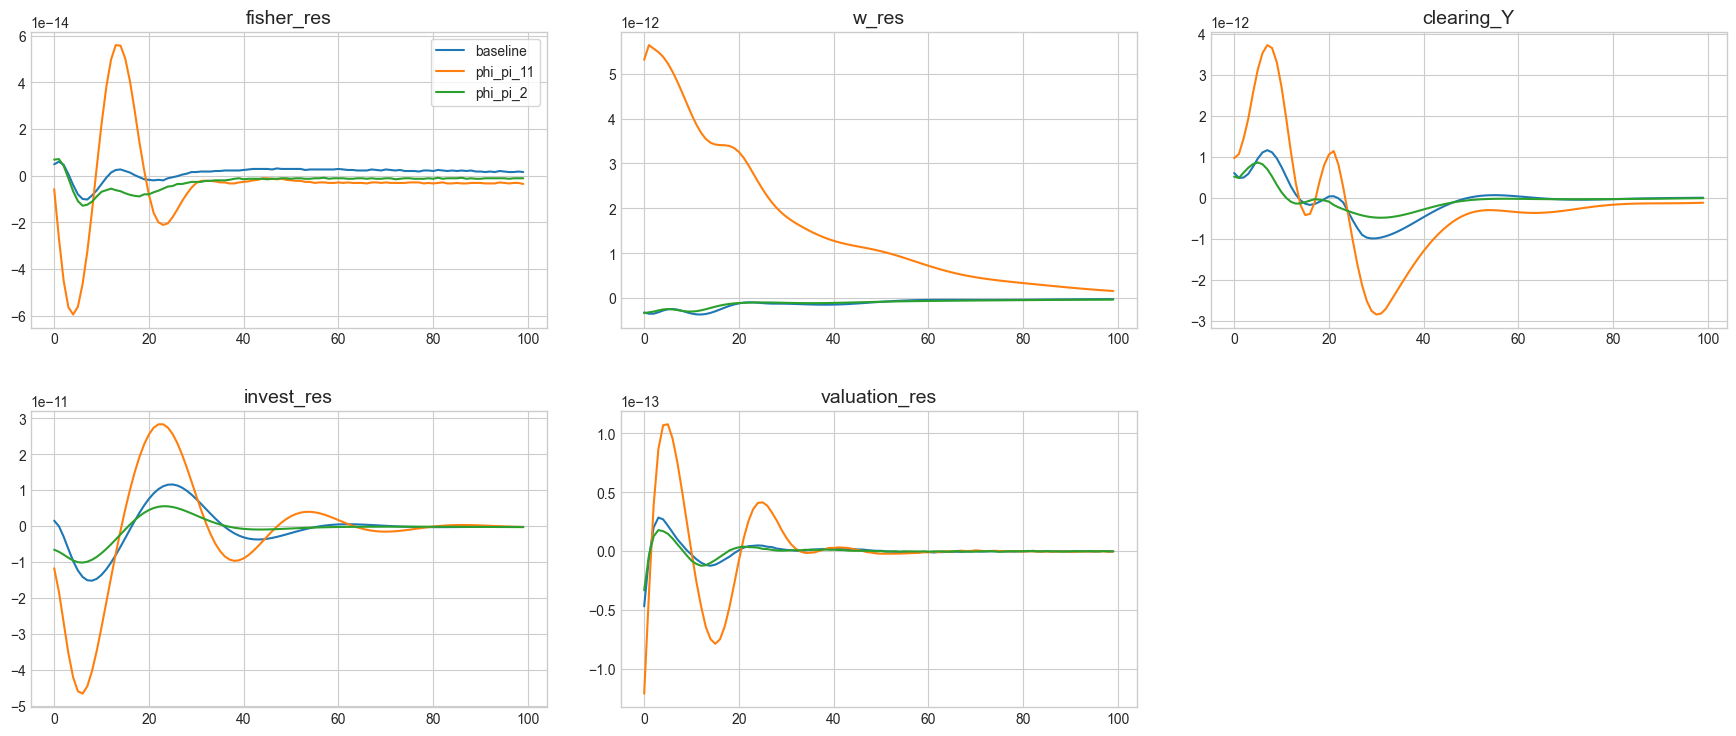

In [77]:
paths_MP = ['Y','I','i','r','Pi']
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=100)

# Stickyness parameters
## Price sticykness

In [78]:
models['xi_p_098'] = {'update_par': {
                'xi_p': 0.98
            }}
models['xi_p_08'] = {'update_par': {
                'xi_p': 0.8
            }}

In [79]:
compare_models = ['baseline', 'xi_p_098', 'xi_p_08']
load_models = ['baseline', 'xi_p_098', 'xi_p_08']

In [80]:
# create other models to be analyzed
# init containter for models
# models_solved = {}
for m in compare_models:
    if m in load_models:
        assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
        models_solved[m].load()
        print(f'model loaded')
    else:
        # init model
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
        # solve model
        models_solved[m].find_ss(do_print=False)
        models_solved[m].compute_jacs(do_print=False)
        models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
        models_solved[m].find_IRFs(do_print=False)
        models_solved[m].save()
        print(f'solved')
        print(f'saved')

Model: baseline
model loaded
Model: xi_p_098
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
Div_int: terminal value is   0.05660173, but ss value is   0.05660377
Div_k: terminal value is   0.02736749, but ss value is   0.02736708
Div: terminal value is   0.08396922, but ss value is   0.08397086
L: terminal value is   0.23000245, but ss value is   0.23000000
Pi_w_increase: terminal value is   0.00000005, but ss value is   0.00000000
Pi_w: terminal value is   0.00000008, but ss value is   0.00000000
Pi: terminal value is   0.00000003, but ss value is   0.00000000
L_hh: terminal value is   0.23000245, but ss value is   0.23000000
solved
saved
Model: xi_p_08
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.000

### shocks ###


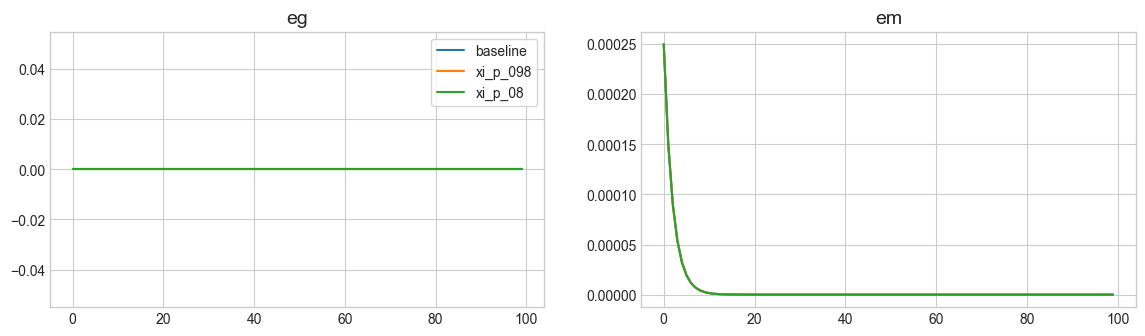


### varnames ###


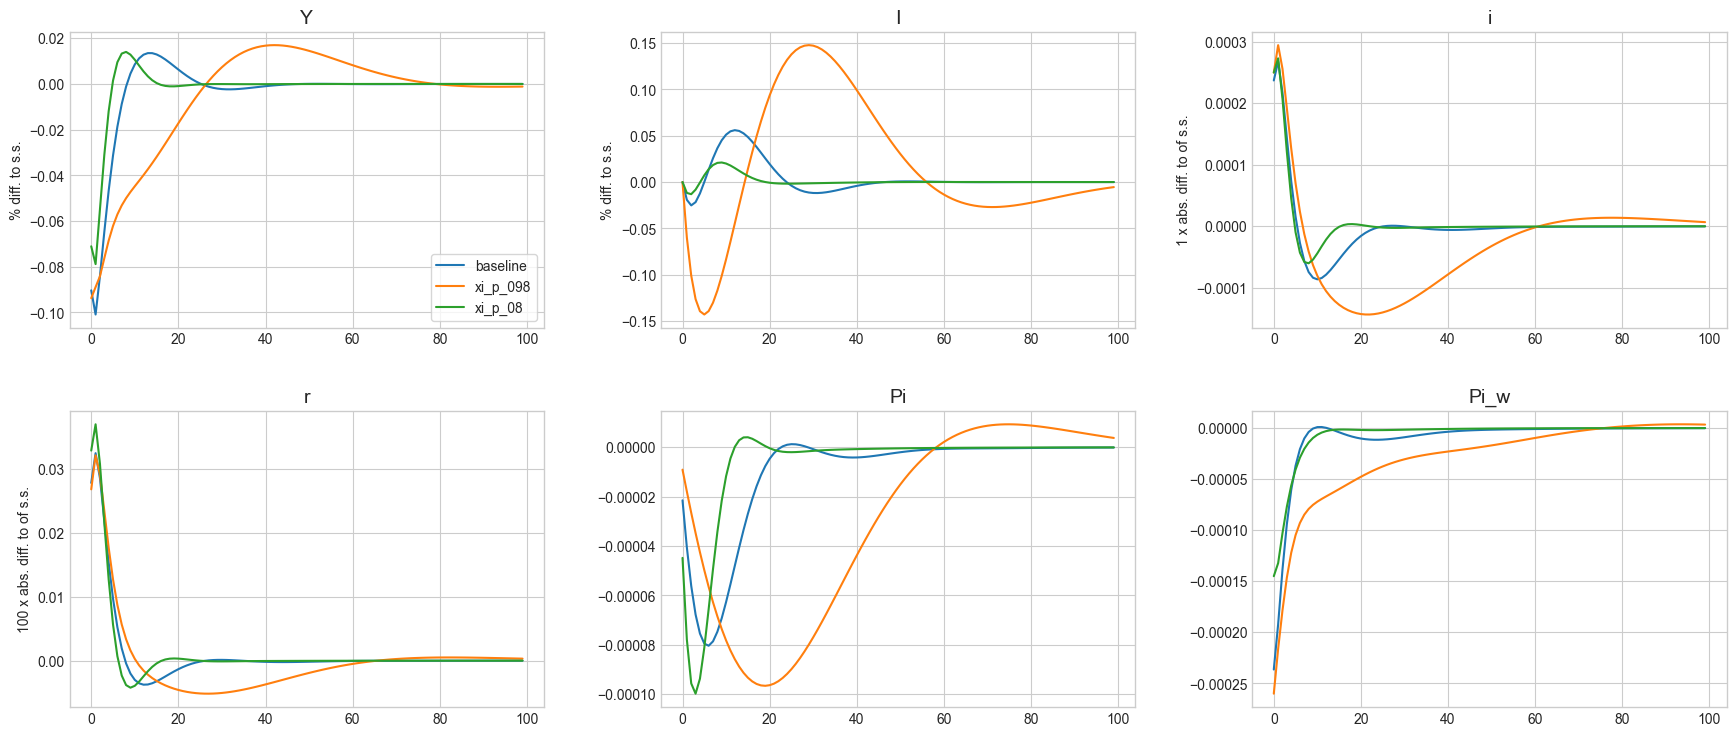


### tagets ###


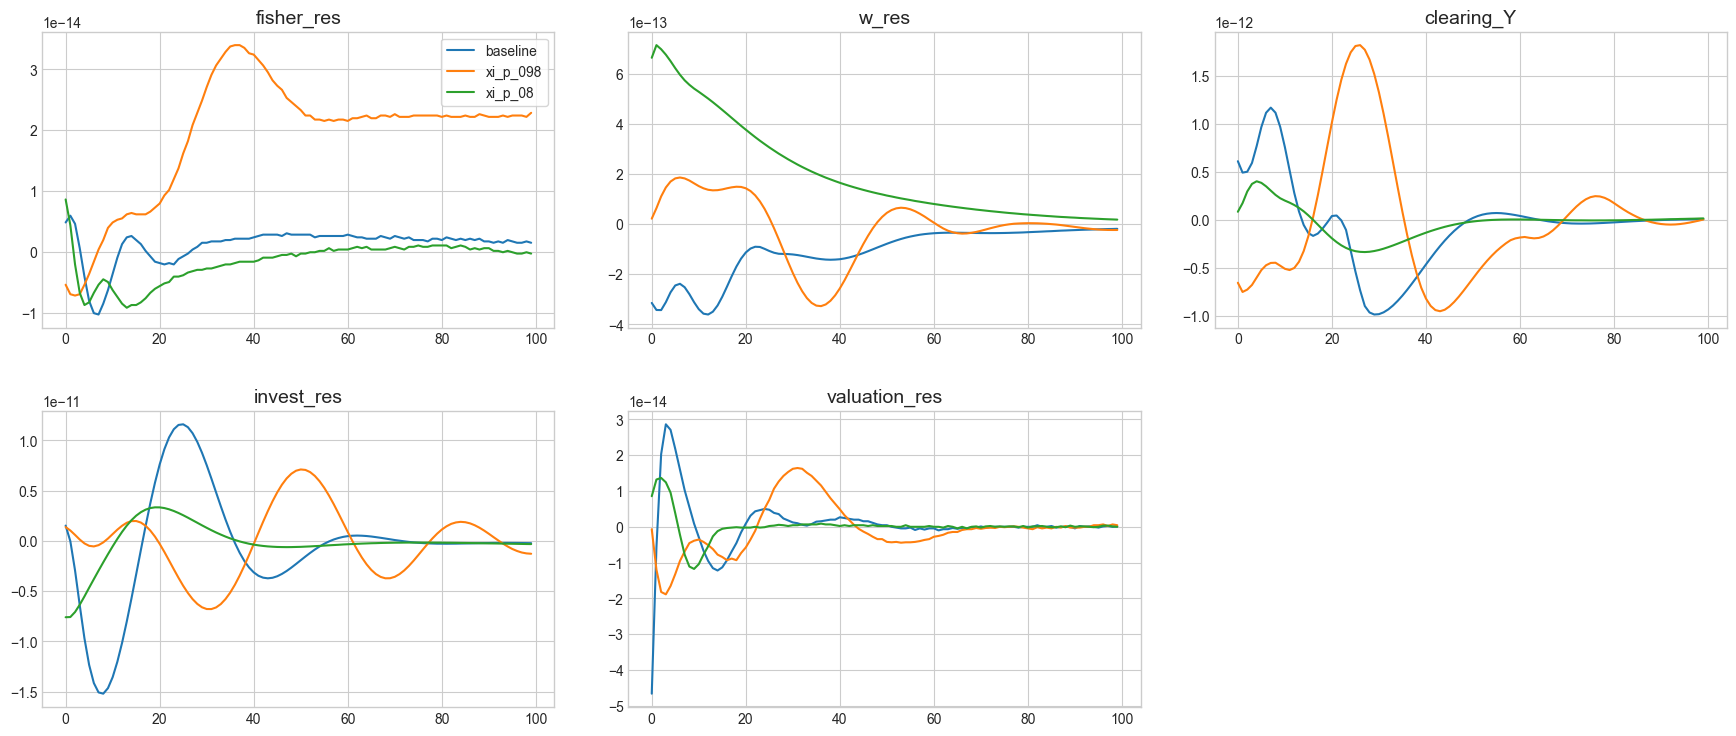

In [81]:
paths_MP = ['Y','I','i','r','Pi', 'Pi_w']
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=100)

## Wage sticykness

In [83]:
models['xi_w_095'] = {'update_par': {
                'xi_w': 0.98
            }}
models['xi_w_085'] = {'update_par': {
                'xi_w': 0.8
            }}

In [84]:
compare_models = ['baseline', 'xi_w_095', 'xi_w_085']
load_models = ['baseline'] #  ,'xi_p_098', 'xi_p_08']

In [85]:
# create other models to be analyzed
# init containter for models
# models_solved = {}
for m in compare_models:
    if m in load_models:
        assert m + '.p' in os.listdir(savefolder), f'{m} not solved yet'
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, savefolder=savefolder)
        models_solved[m].load()
        print(f'model loaded')
    else:
        # init model
        print(f'Model: {m}')
        models_solved[m] = HANKStickyModelClass(name=m, par=models[m]['update_par'], savefolder=savefolder)
        # solve model
        models_solved[m].find_ss(do_print=False)
        models_solved[m].compute_jacs(do_print=False)
        models_solved[m].find_transition_path(do_print=False, do_print_unknowns=False)
        models_solved[m].find_IRFs(do_print=False)
        models_solved[m].save()
        print(f'solved')
        print(f'saved')

Model: baseline
model loaded
Model: xi_w_095
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved
Model: xi_w_085
clearing_A: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_start: terminal value is   0.00000002, but ss value is   0.00000000
clearing_fund_end: terminal value is  -0.00000002, but ss value is   0.00000000
solved
saved


### shocks ###


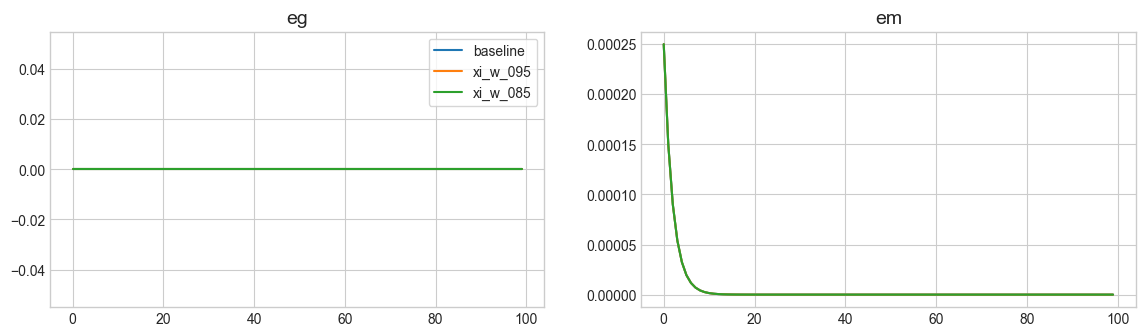


### varnames ###


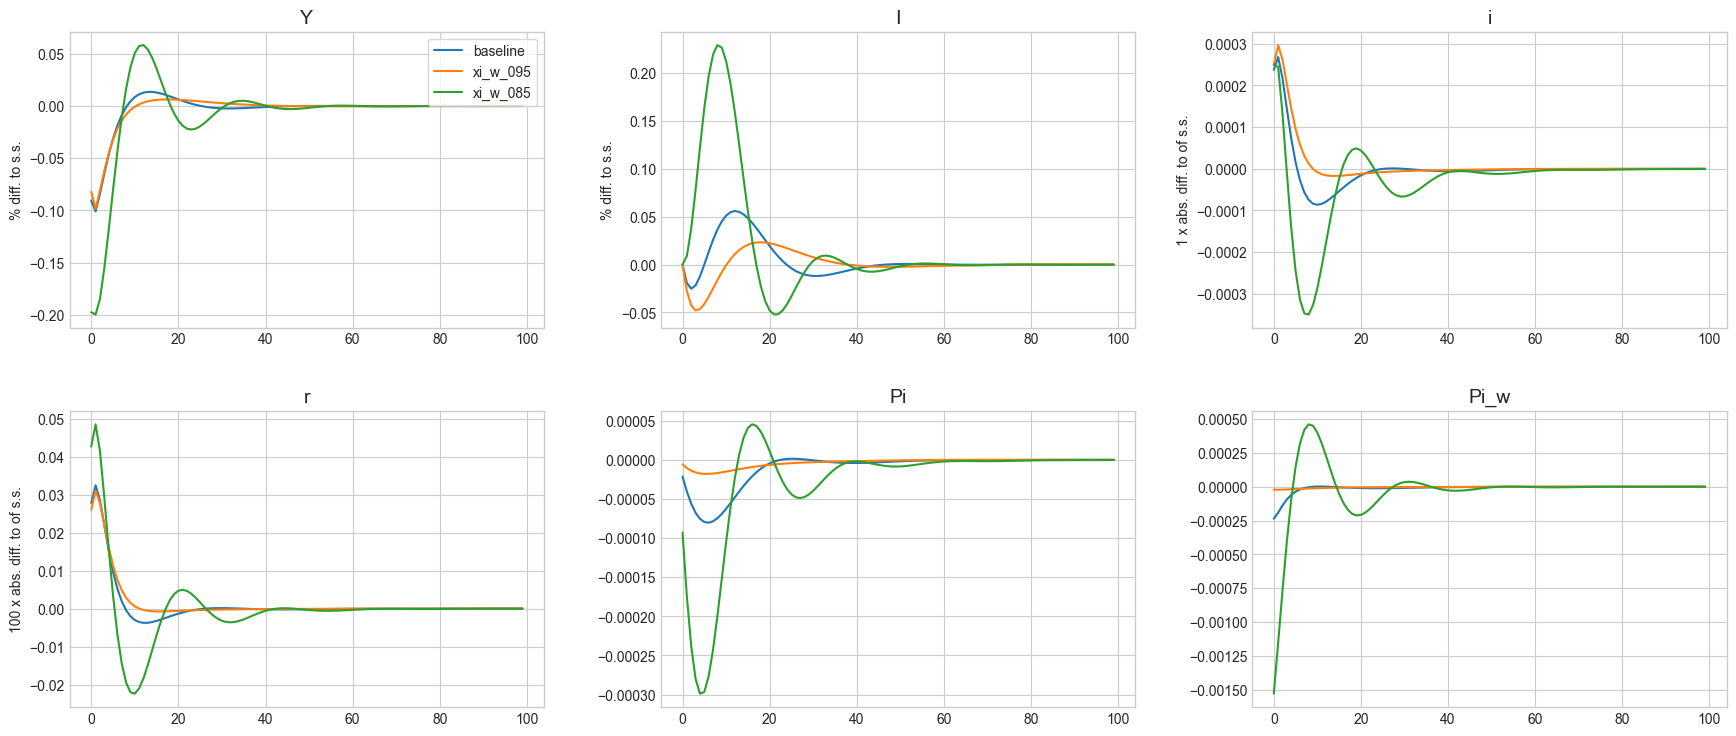


### tagets ###


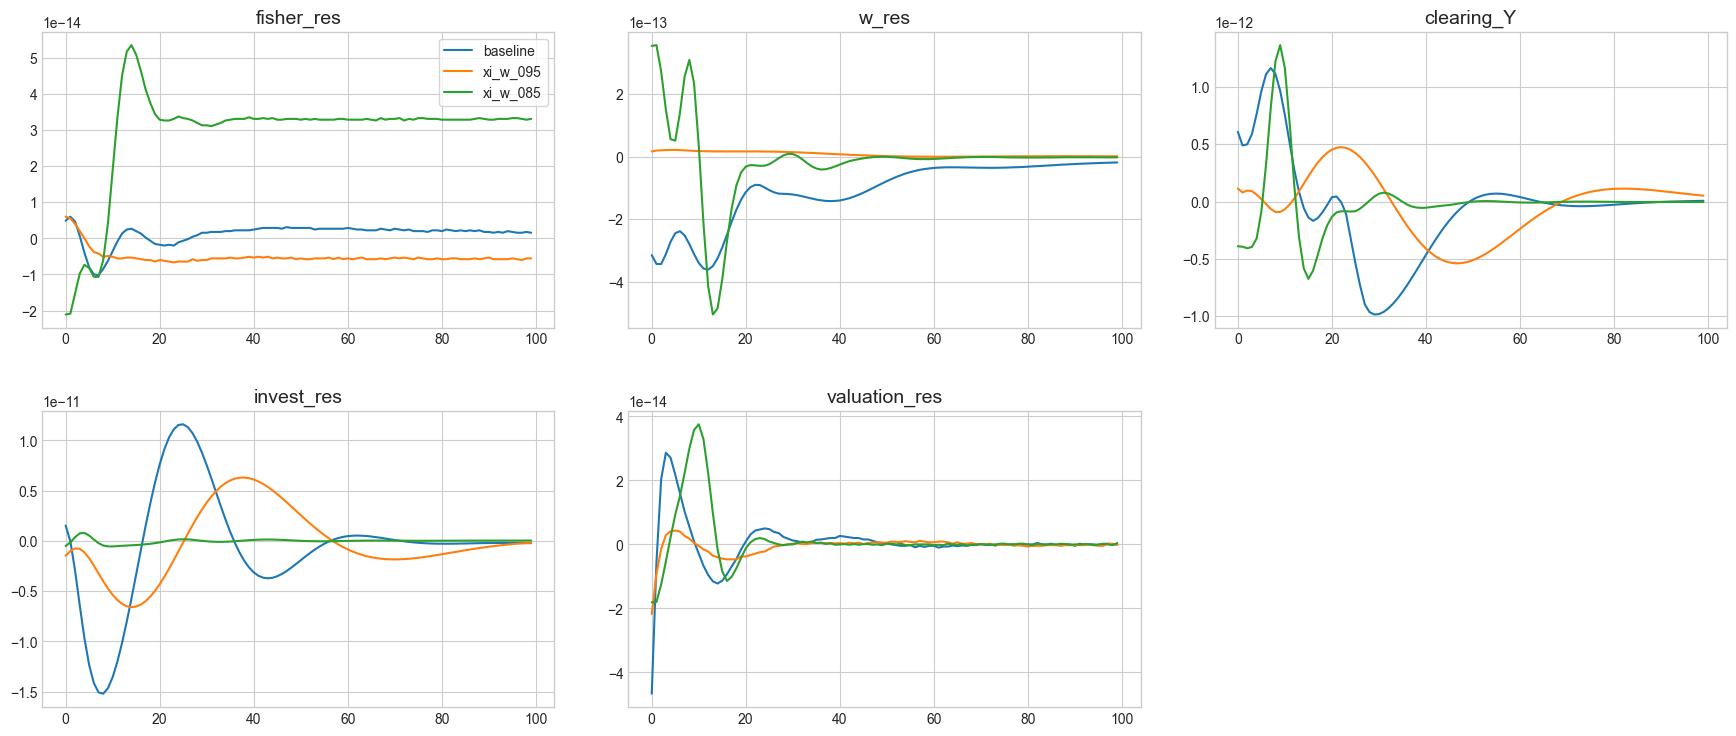

In [86]:
paths_MP = ['Y','I','i','r','Pi', 'Pi_w']
models_list = []
for m in compare_models:
    models_list.append(models_solved[m])
models_solved['baseline'].compare_IRFs(models_list, compare_models, paths_MP, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=100)